In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials,space_eval

In [2]:
df = pd.read_csv('Sample-0004.csv')

In [3]:
df

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,1.433158,-0.135424,-0.411514,-0.430135,-0.004761,-0.010526,-0.007826,-0.008587,0.815313,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
1,1.347939,-0.061015,-0.411514,-0.430135,-0.004761,-0.010526,-0.007826,-0.008587,0.815313,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
2,1.441331,-0.080833,-0.411514,-0.430135,-0.004761,-0.010526,-0.007826,-0.008587,0.815313,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
3,1.341744,-0.034491,-0.411514,-0.430135,-0.004761,-0.010526,-0.007826,-0.008587,0.815313,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
4,1.441067,-0.074840,-0.411514,-0.430135,-0.004761,-0.010526,-0.007826,-0.008587,0.815313,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34703,0.076511,-0.524380,-0.411514,-0.430135,0.457547,0.087674,0.005299,0.065032,1.169754,1.512796,...,1.369987,-0.120571,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,0.750086,7
34704,-2.564483,2.369977,-0.411514,-0.430135,0.294406,0.350849,1.676032,0.929084,0.992534,1.329547,...,-0.648481,3.051206,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,0.750086,7
34705,-2.564483,2.371282,-0.411514,-0.430135,1.316805,0.291929,0.108340,0.177398,0.992534,1.329547,...,-0.726665,0.336410,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,0.750086,7
34706,-2.564483,2.370748,-0.411514,-0.430135,0.110479,0.152485,0.436717,0.278139,0.992534,1.329547,...,-0.429432,0.336410,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,0.750086,7


In [4]:
X = df.drop(['Attack'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [6]:
features = df.dtypes[df.dtypes != 'object'].index

In [7]:
#Feature engineering
#Feature selection by information gain
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [8]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        


In [9]:
X_fs = df[fs].values
X_fs.shape

(34708, 23)

In [10]:
#Re-split train & test sets after feature selection
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [11]:
X_train.shape

(27766, 23)

In [12]:
pd.Series(y_train).value_counts()

1    13447
5     6178
7     2740
0     1946
8     1210
9      784
2      651
6      366
3      238
4      206
dtype: int64

In [13]:
from collections import Counter
print("Before Sampling: ",Counter(y_train))

Before Sampling:  Counter({1: 13447, 5: 6178, 7: 2740, 0: 1946, 8: 1210, 9: 784, 2: 651, 6: 366, 3: 238, 4: 206})


In [14]:
from collections import Counter
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_trainf, y_trainf = smote_tomek.fit_resample(X_train, y_train)

In [15]:
print(sorted(Counter(y_trainf).items()))

[(0, 13399), (1, 13445), (2, 13414), (3, 13287), (4, 13385), (5, 13252), (6, 13431), (7, 13447), (8, 13409), (9, 13395)]


In [16]:
pd.Series(y_trainf).value_counts()

7    13447
1    13445
6    13431
2    13414
8    13409
0    13399
9    13395
4    13385
3    13287
5    13252
dtype: int64

In [17]:
# Define k-fold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [18]:
rf_clf = RandomForestClassifier()

In [19]:

# Define grid of hyperparameters to search over
rf_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search for best hyperparameters using cross-validation
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
rf_grid_search.fit(X_trainf, y_trainf)

# Print best hyperparameters and corresponding score
print("Best hyperparameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid_search.best_score_)

Best hyperparameters for Random Forest: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}
Best cross-validation score for Random Forest: 0.8829384121936223


In [ ]:
# Train Random Forest model using best hyperparameters and predict on test set
rf_best = rf_grid_search.best_estimator_
rf_best.fit(X_trainf, y_trainf)
y_pred_rf = rf_best.predict(X_test)

In [ ]:
# Calculate accuracy and confusion matrix for Random Forest model
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Accuracy for Random Forest:", acc_rf)
print("Confusion matrix for Random Forest:\n", cm_rf)

Accuracy of RF: 0.9507346585998271
Precision of RF: 0.9676153342664785
Recall of RF: 0.9507346585998271
F1-score of RF: 0.9572569827884717
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       487
           1       1.00      1.00      1.00      3362
           2       0.97      0.93      0.95       163
           3       0.13      0.40      0.20        60
           4       0.77      0.80      0.79        51
           5       0.96      0.85      0.90      1545
           6       0.88      0.97      0.92        91
           7       0.99      1.00      0.99       685
           8       0.98      0.94      0.96       302
           9       0.73      0.97      0.83       196

    accuracy                           0.95      6942
   macro avg       0.84      0.88      0.85      6942
weighted avg       0.97      0.95      0.96      6942



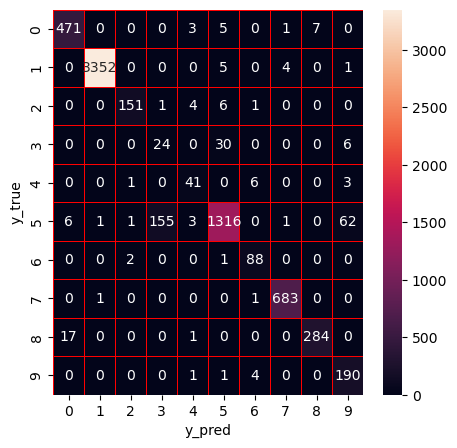

In [17]:
rf = RandomForestClassifier(max_depth=80, max_features= 'log2',min_samples_leaf= 4 ,min_samples_split= 10, n_estimators=1000)
rf.fit(X_trainf,y_trainf) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [23]:
print(X_trainf.shape)
print(y_trainf.shape)

(133864, 23)
(133864,)


In [19]:
y_pred=rf.predict(X_trainf)
accuracy=accuracy_score(y_pred,y_trainf)
print(accuracy)

0.9832516583995697
